In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn import preprocessing,model_selection,svm

In [11]:
def get_data(url):
    r=requests.get(url)
    with open('student_scores.csv','wb')as f:
        f.write(r.content)

In [12]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
get_data(url)

In [3]:
df=pd.read_csv('student_scores.csv')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
#calculating the pearson correlation coefficient 
corr,_=pearsonr(df['Hours'],df['Scores'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.976


Relation of Score and Hours shows a positive correlation between them

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

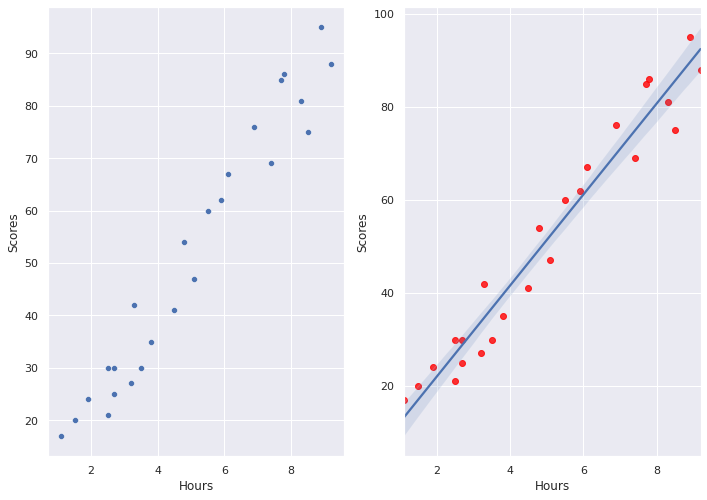

In [26]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1,2,1)
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.subplot(1,2,2)
sns.regplot(x='Hours',y='Scores',scatter_kws={"color": "red"},data=df)

Defining the Feature set and label set

In [108]:
X=np.array(df.Hours)
y=np.array(df.Scores)

In [109]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

In [110]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

Training the model

In [111]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [112]:
accuracy=model.score(X_test,y_test)

In [113]:
accuracy

0.9737523387864423

In [114]:
#Seeing the value it predicted
for X,y in zip(X_test,y_test):
    print(f"Model {model.predict([X])[0]} Actual:{y}")

Model 62.053106374900615 Actual:67
Model 60.08842361707091 Actual:62
Model 16.865402944817305 Actual:20
Model 39.459254659858956 Actual:35
Model 83.66461671102743 Actual:81


Plotting the prediction and real 

In [116]:
y_predict=model.predict(X_test)

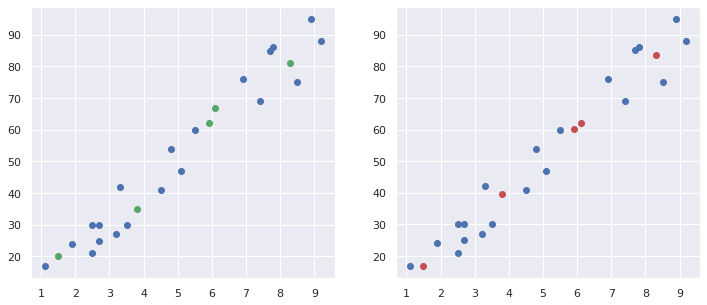

In [127]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test,color='g')
plt.subplot(1,2,2)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_predict,color='r')

The green value in the circle shows the test data with and the red in right plot shows the predicted

In [115]:
model.predict([[9.25]])

array([92.99685981])

Predicted Score after studying 9.25 hours in 92.99